In [2]:
# 載入套件
import tensorflow as tf

# 顯示版本
print(tf.__version__)

2.4.1


## 檢查 GPU 是否存在

In [2]:
# check cuda available
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 宣告 tensor 常數(constant)，參數可以是常數、list、numpy array

In [3]:
# 宣告常數(constant)，參數可以是常數、list、numpy array
x = tf.constant([[1, 2]])

## 以四則運算符號計算

In [4]:
print(x+10)
print(x-10)
print(x*2)
print(x/2)

tf.Tensor([[11 12]], shape=(1, 2), dtype=int32)
tf.Tensor([[-9 -8]], shape=(1, 2), dtype=int32)
tf.Tensor([[2 4]], shape=(1, 2), dtype=int32)
tf.Tensor([[0.5 1. ]], shape=(1, 2), dtype=float64)


In [5]:
# 轉換為 NumPy Array
(x+10).numpy()

array([[11, 12]])

In [6]:
type(x.numpy())

numpy.ndarray

## 使用 TensorFlow 函數

In [7]:
# 轉為負數
print(tf.negative(x))

# 常數、List、Numpy array 均可運算
print(tf.add(1, 2))
print(tf.add([1, 2], [3, 4]))

print(tf.square(5))
print(tf.reduce_sum([1, 2, 3]))

# 混用四則運算符號及TensorFlow 函數
print(tf.square(2) + tf.square(3))

tf.Tensor([[-1 -2]], shape=(1, 2), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)


## TensorFlow 會自動決定在 cpu or gpu 運算

In [8]:
x1 = tf.constant([[1, 2, 3]], dtype=float)
print("x1 是否在 GPU #0 上:  ", x1.device.endswith('GPU:0'))

# 設定 x 為均勻分配亂數 3x3
x2 = tf.random.uniform([3, 3])
print("x2 是否在 GPU #0 上:  ", x2.device.endswith('GPU:0'))

x3=x1+x2
print("x3 是否在 GPU #0 上:  ", x3.device.endswith('GPU:0'))

x1 是否在 GPU #0 上:   False
x2 是否在 GPU #0 上:   True
x3 是否在 GPU #0 上:   True


## 強制指定在cpu或gpu運算

In [11]:
import time

# 計算 10 次的時間
def time_matmul(x):
    start = time.time()
    for loop in range(10):
        tf.matmul(x, x)

    result = time.time()-start
    print("{:0.2f}ms".format(1000*result))

# 強制指定在cpu運算
print("On CPU:", end='')
with tf.device("CPU:0"):
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("CPU:0")
    time_matmul(x)

# 強制指定在gpu運算
if tf.config.list_physical_devices("GPU"):
    print("On GPU:", end='')
    with tf.device("GPU:0"): 
        x = tf.random.uniform([1000, 1000])
        assert x.device.endswith("GPU:0")
        time_matmul(x)

On CPU:58.00ms
On GPU:1.00ms


## 稀疏矩陣(sparse matrix)

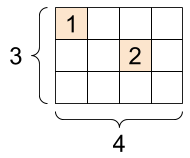

In [12]:
from IPython.display import Image
Image('./images/sparse matrix.png')

In [14]:
# 稀疏矩陣只需設定有值的位置及數值
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor)

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [15]:
# 轉為正常的矩陣格式
x = tf.sparse.to_dense(sparse_tensor)
print(type(x))

# 2.31 以前版本會出錯
x.numpy()

<class 'tensorflow.python.framework.ops.EagerTensor'>


array([[1, 0, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 0]])

## 回歸 TF 1.x 版 Graph Execution Mode

In [28]:
if tf.__version__[0] != '1':           # 是否為 TensorFlow 1.x版
    import tensorflow.compat.v1 as tf  # 改變載入套件的命名空間(Namespace)
    tf.disable_v2_behavior()           # 使 2.x 版功能失效(Disable)

Instructions for updating:
non-resource variables are not supported in the long term


In [29]:
# 測試1.x版程式
x = tf.constant([[1, 2]])
neg_x = tf.negative(x)

with tf.Session() as sess:   # 使用 session
    result = sess.run(neg_x)
    print(result)

[[-1 -2]]


## GPU記憶體管理

In [3]:
# 限制 TensorFlow 只能使用 GPU 2GB 記憶體
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:    
    try:
        # 限制 第一顆 GPU 只能使用 2GB 記憶體
        tf.config.experimental.set_virtual_device_configuration(gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*2)])
        
        # 顯示 GPU 個數
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # 顯示錯誤訊息
        print(e)

1 Physical GPUs, 1 Logical GPUs


## Disable GPU

In [4]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"